# ANN Implementation

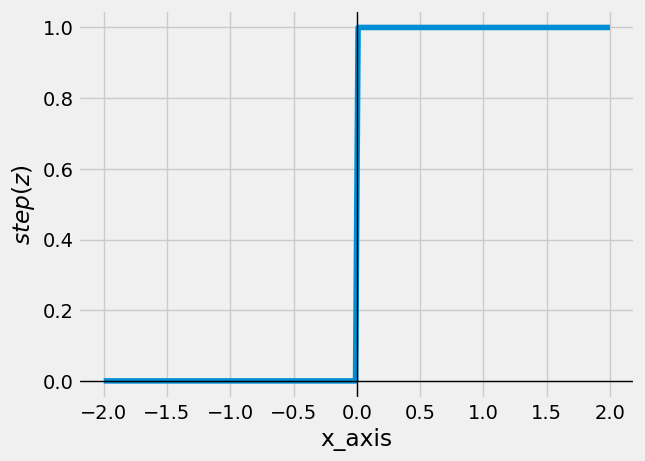

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

x_axis = np.linspace(-2,2,200)
step = np.where(x_axis < 0, 0, 1)

plt.plot(x_axis, step)
plt.xlabel("x_axis")
plt.ylabel(r"$step(z)$")
plt.axhline(0, color='k', lw=1);
plt.axvline(0, color='k', lw=1);

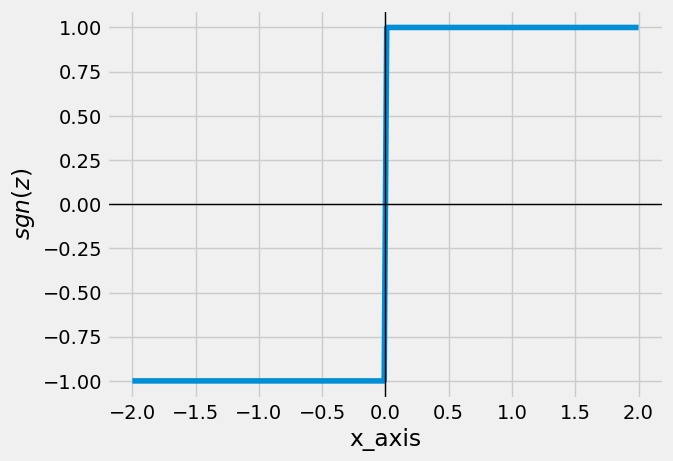

In [2]:
def sgn(x):
    if x < 0:
        return -1
    elif x > 0:
        return 1
    return 0

sgn = np.array(list(map(sgn, x_axis)))

plt.plot(x_axis, sgn)
plt.xlabel("x_axis")
plt.ylabel(r"$sgn(z)$")
plt.axhline(0, color='k', lw=1);
plt.axvline(0, color='k', lw=1);

* Why we use tensorflow when we could do the samething using numpy. Because in tensorflow it gives us the chance to use gpu in that case the matrix operations could be performed within very short span of time 
* Keras / pytorch
    * If is nothing but a wrapper which consists of classes and functions .In the backend it uses tensorflow only .Thats why we call it a high level API . In keras we can write the same thing using single line of code where if we use tensorflow we gonna have to write multiple lines of codes . And same goes for pytorch as well 
       
* In cpu ,if we have 4 cores , then those 4 cores are responsible for parellel processing .  When we perform a matrix operations in each core we can perform a seperate matrix operation . In GPUS there are cuda cores and in there , there are 1000s of cores . So our matric operaions can be parallely performed so quickly . 

* For machine learning if we want to use cuda gpus there is a seperate library called 'JAX' we can use that . 

In [3]:
import tensorflow as tf
import numpy 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
# Check the tf version
tf.__version__

'2.15.0'

In [4]:
## Check whether gpu is avilable (if it gives an empty list that means we are not using gpu)
tf.config.list_physical_devices('GPU')

[]

In [11]:
## Details of my gpu 
!nvidia-smi

Fri Feb  2 10:38:46 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.78       Driver Version: 512.78       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P0    23W /  N/A |      0MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [38]:
tf.config.list_physical_devices('GPU')

[]

In [101]:
minst = tf.keras.datasets.mnist

In [102]:
(X_train_full ,y_train_full) , (X_test,y_test) = minst.load_data()

In [103]:
X_train_full.shape  # 60000 data points of  28*28 images  , gray scale 

(60000, 28, 28)

In [104]:
y_train_full.shape

(60000,)

In [105]:
X_test.shape

(10000, 28, 28)

In [106]:
img = X_train_full[0]
img.shape

(28, 28)

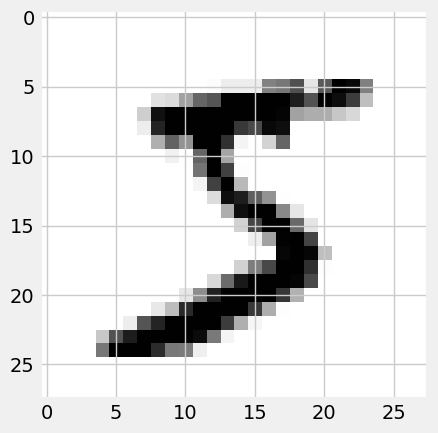

In [107]:
plt.imshow(img,cmap='binary')

'\nThe pixel values of an image typically range from 0 to 255, where 0 represents black and 255 \nrepresents white (for grayscale images). For color images, each channel (red, green, blue) also ranges from 0 to 255.\n\nThe expression img/255 is typically used to normalize the pixel values of an image to the \nrange [0, 1]. This normalization is often performed before feeding the image data into machine \nlearning models or when visualizing images with libraries like Seaborn or Matplotlib.\n\nNormalizing the pixel values to the range [0, 1] can help improve the convergence of machine \nlearning algorithms and ensures that the features have similar scales, which can lead to better\nperformance.\n\n'

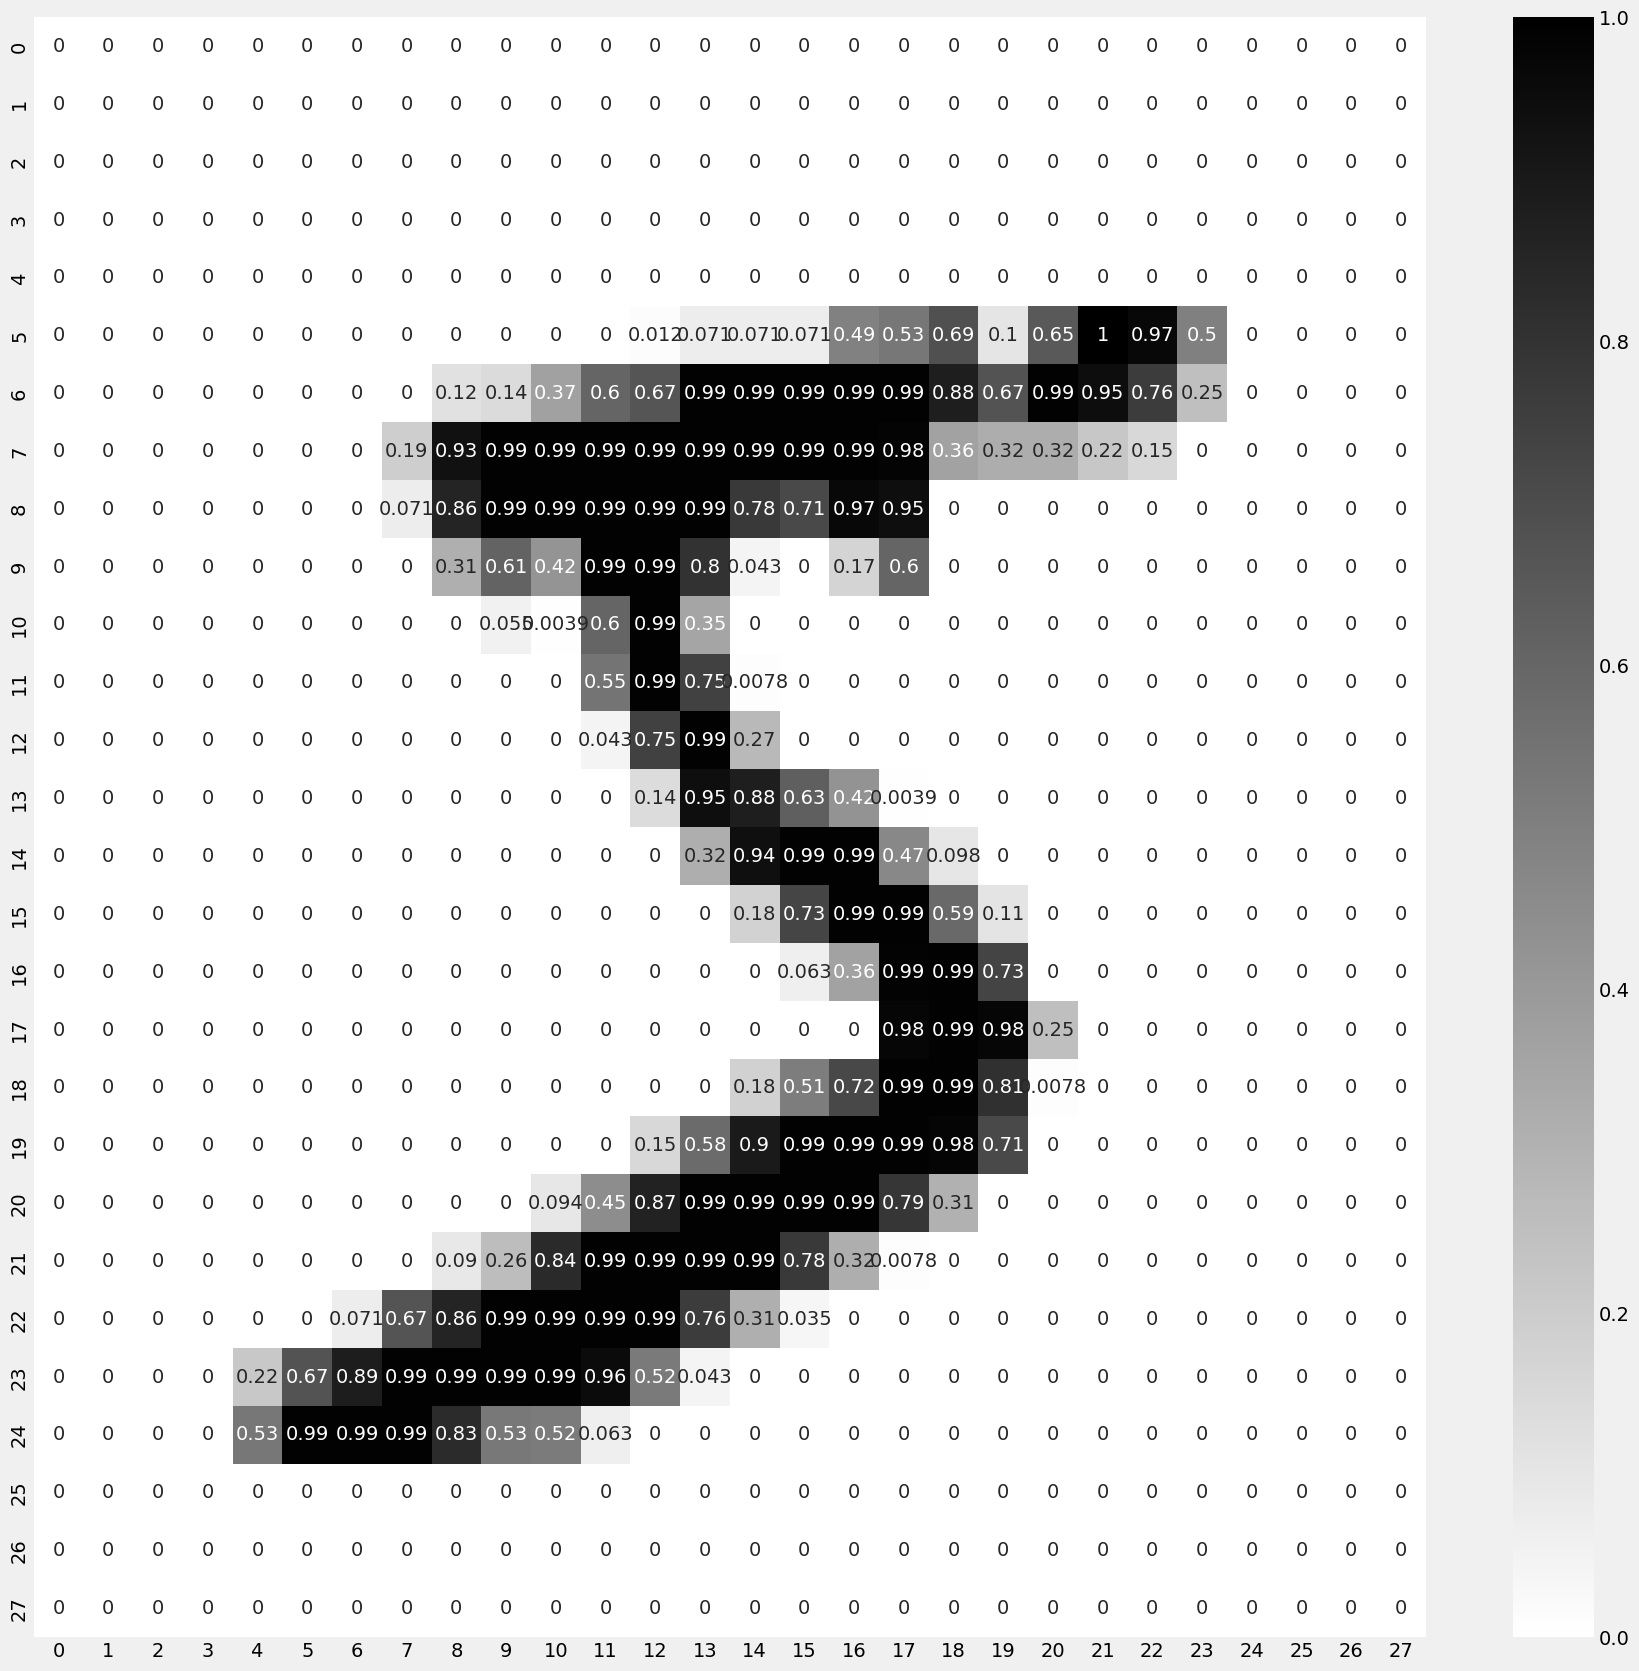

In [108]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255,annot=True,cmap='binary')   

# each pixel can have a value in between 0 - (2^8-1)

'''
The pixel values of an image typically range from 0 to 255, where 0 represents black and 255 
represents white (for grayscale images). For color images, each channel (red, green, blue) also ranges from 0 to 255.

The expression img/255 is typically used to normalize the pixel values of an image to the 
range [0, 1]. This normalization is often performed before feeding the image data into machine 
learning models or when visualizing images with libraries like Seaborn or Matplotlib.

Normalizing the pixel values to the range [0, 1] can help improve the convergence of machine 
learning algorithms and ensures that the features have similar scales, which can lead to better
performance.

'''

In [109]:
## validation and training
X_valid , X_train = X_train_full[:5000]/255 , X_train_full[5000:] / 255
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]

X_test = X_test/255

# Architecture 

* In the context of Artificial Neural Networks (ANNs), flattening of images refers to converting a two-dimensional array representing an image into a one-dimensional array. ANNs, especially deep learning models like convolutional neural networks (CNNs), typically require one-dimensional input data.

* Here's how flattening is typically done in the context of ANNs:
    * Grayscale Images: For grayscale images, each pixel is represented by a single intensity value ranging from 0 to 255 (or 0 to 1 if the image has been normalized). Flattening such an image involves arranging these pixel values into a one-dimensional array, typically in row-major order or column-major order.

    * Color Images: For color images, each pixel is represented by three intensity values corresponding to the red, green, and blue channels. The image is usually represented as a three-dimensional array (height x width x 3). Flattening a color image involves concatenating the pixel values of each channel into a one-dimensional array. This can be done by stacking the rows of each channel on top of each other or by flattening each channel separately and then concatenating them.
    
    
<br>
<br>

<img src="WhatsApp Image 2024-02-02 at 15.28.56 (1).jpeg"  width="400" />

In [110]:
CLASSES=10  # number of classes in the classification task
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28,28),name="inputlayer"),
    tf.keras.layers.Dense(300,activation="relu" ,name="hiddenLayer1"),
    tf.keras.layers.Dense(100 ,activation="relu" ,name="hiddenLayer2"),
    tf.keras.layers.Dense(CLASSES, activation="softmax",name="outputlayer"),
    
]

In [111]:
# Sequential : Starting from left and sequentially flows   (every previous layer is connected )
# Parallel : we can pass some of the the nuerons in the middle layers 
model_clf = tf.keras.models.Sequential(LAYERS)

In [112]:
model_clf.layers

In [113]:
model_clf.layers[1].name

'hiddenLayer1'

In [114]:
model_clf.layers[1].get_weights()

[array([[-0.0512068 ,  0.01307959, -0.01019041, ..., -0.04627435,
         -0.0019791 ,  0.00116256],
        [ 0.04954326,  0.03085712,  0.07073835, ...,  0.0402844 ,
         -0.03221405,  0.07354601],
        [ 0.06167386, -0.05286432, -0.03524485, ..., -0.02659777,
          0.0104041 ,  0.02418597],
        ...,
        [-0.06592504,  0.02195712, -0.00658312, ..., -0.07331919,
          0.02567327,  0.06291567],
        [ 0.05458564, -0.06847326, -0.01551686, ...,  0.06137867,
         -0.01059377,  0.05178352],
        [ 0.06955417,  0.05174302, -0.07399493, ..., -0.01828824,
         -0.06259059, -0.04881055]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [115]:
weights , biases = model_clf.layers[1].get_weights()

In [116]:
weights.shape

(784, 300)

In [117]:
biases.shape

(300,)

In [118]:
model_clf.summary()
# first layer : (784*300) +  300   : 300 biases =>   235500     : Total weights
# second layer : (300*100) + 100  : 100 biases  =>  30100       : Total weights 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [119]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION, 
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [120]:
EPOCHS = 30
VALIDATION = (X_valid , y_valid)
history = model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION)
# It will run the first epoch on the train , test and immediately after that it will validate on the 
# validation set  ,  set is a seperate set to finally get an idea about the performance 

# Epoch 2/30   : batch size = 30  ->  divide entire training set / 30  , so in ecah epoch there wil
# be  that many steps (divide entire training set / 30 )

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5987 - accuracy: 0.8485 - val_loss: 0.3121 - val_accuracy: 0.9142
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2896 - accuracy: 0.9187 - val_loss: 0.2426 - val_accuracy: 0.9332
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2370 - accuracy: 0.9324 - val_loss: 0.2093 - val_accuracy: 0.9404
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2019 - accuracy: 0.9429 - val_loss: 0.1782 - val_accuracy: 0.9498
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1761 - accuracy: 0.9501 - val_loss: 0.1622 - val_accuracy: 0.9566
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1559 - accuracy: 0.9558 - val_loss: 0.1438 - val_accuracy: 0.9608
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1392 - accuracy: 0.9606 - val_loss: 0.1322 - val_accuracy:

In [121]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.598691,0.848509,0.312111,0.9142
1,0.289587,0.918673,0.242554,0.9332
2,0.237037,0.932400,0.209303,0.9404
3,0.201859,0.942909,0.178171,0.9498
4,0.176131,0.950073,0.162184,0.9566
5,0.155914,0.955836,0.143761,0.9608
6,0.139224,0.960600,0.132235,0.9640
7,0.126301,0.963309,0.127021,0.9658
8,0.115010,0.967545,0.116971,0.9688
9,0.105312,0.970400,0.109685,0.9692


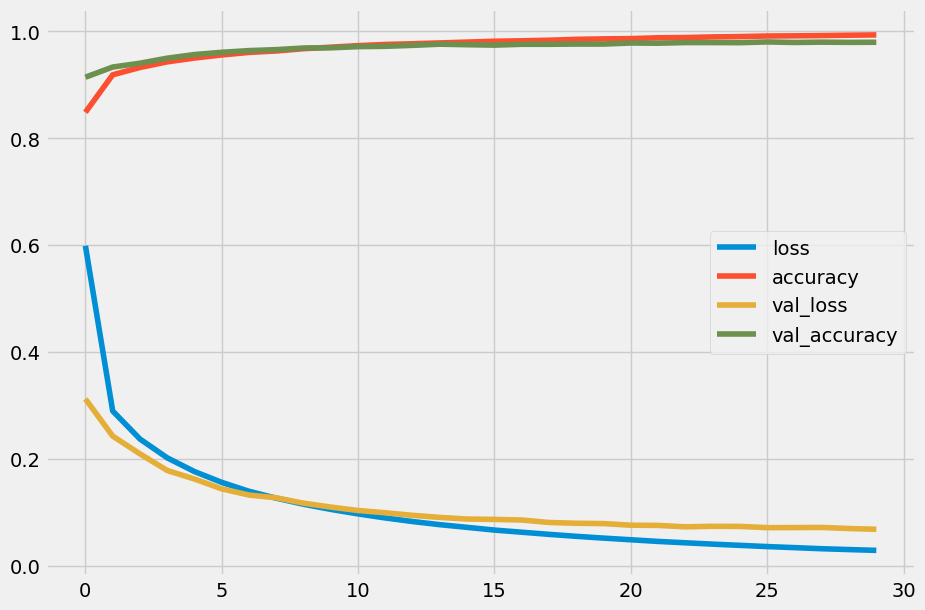

In [122]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [123]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0704 - accuracy: 0.9777


[0.07043333351612091, 0.9776999950408936]

In [124]:
model_clf.save("test.h5")

C:\Users\Tharindu\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [125]:
X_new = X_test[:3]


y_prob = model_clf.predict(X_new)

y_prob.round(3)

1/1 [==============================] - 0s 53ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [126]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([7, 2, 1], dtype=int64)

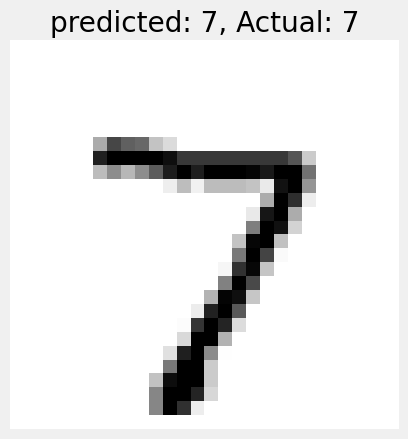

------------------------------------------------------------


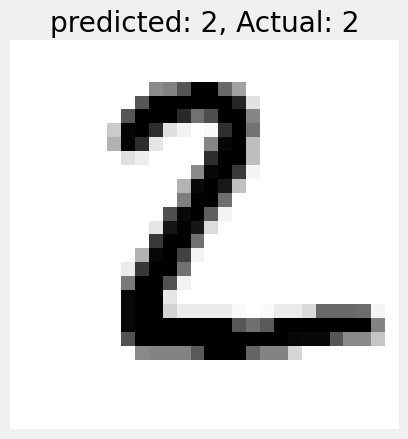

------------------------------------------------------------


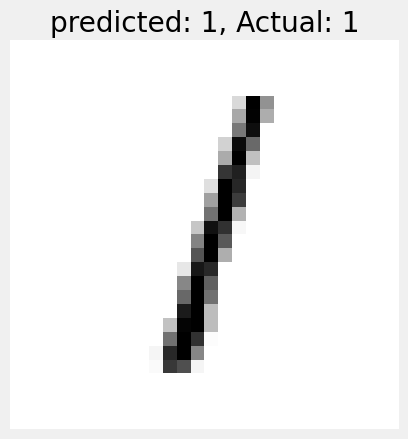

------------------------------------------------------------


In [127]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
  plt.imshow(img_array, cmap="binary")
  plt.title(f"predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("--"*30)